In [17]:
import os
import csv
import textract
import fitz  # PyMuPDF
import pypdfium2 as pdfium
import pdftotext  # pdftotext
from tika import parser  # Tika
import time
import matplotlib.pyplot as plt


In [18]:
def process_pdfs_textract(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                try:
                    text = textract.process(pdf_path)
                    text = text.decode('utf-8')
                    data.append([pdf_id, text, class_name])
                    pdf_id += 1
                    elapsed_time = time.time() - start_time
                    total_time += elapsed_time

                except Exception as e:
                    elapsed_time = time.time() - start_time
                    total_time += elapsed_time
                    print(f"Erro ao processar {filename}: {e}")

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)

    print(f"Dados salvos em {output_csv}")
    print(f"Tempo total de execução (textract): {total_time:.2f} segundos")
    
    return total_time


In [19]:
def process_pdfs_pymupdf(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                try:
                    doc = fitz.open(pdf_path)
                    text = ""
                    for page_num in range(len(doc)):
                        page = doc.load_page(page_num)
                        text += page.get_text()
                    elapsed_time = time.time() - start_time

                    data.append([pdf_id, text, class_name])
                    pdf_id += 1
                    total_time += elapsed_time

                except Exception as e:
                    elapsed_time = time.time() - start_time
                    total_time += elapsed_time
                    print(f"Erro ao processar {filename} com PyMuPDF: {e}")

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)

    print(f"Dados salvos em {output_csv}")
    print(f"Tempo total de execução (PyMuPDF): {total_time:.2f} segundos")
    return total_time

In [20]:
def process_pdfs_pypdfium2(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                try:
                    pdf = pdfium.PdfDocument(pdf_path)
                    text = ""
                    for page_num in range(len(pdf)):
                        page = pdf.get_page(page_num)
                        text += page.get_textpage().get_text_range()
                    elapsed_time = time.time() - start_time

                    data.append([pdf_id, text, class_name])
                    pdf_id += 1
                    total_time += elapsed_time

                except Exception as e:
                    elapsed_time = time.time() - start_time
                    total_time += elapsed_time
                    print(f"Erro ao processar {filename} com pypdfium2: {e}")

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)

    print(f"Dados salvos em {output_csv}")
    print(f"Tempo total de execução (pypdfium2): {total_time:.2f} segundos")
    return total_time


In [21]:
def process_pdfs_pdftotext(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                try:
                    with open(pdf_path, "rb") as f:
                        pdf = pdftotext.PDF(f)
                    text = "\n\n".join(pdf)
                    elapsed_time = time.time() - start_time

                    data.append([pdf_id, text, class_name])
                    pdf_id += 1
                    total_time += elapsed_time

                except Exception as e:
                    elapsed_time = time.time() - start_time
                    total_time += elapsed_time
                    print(f"Erro ao processar {filename} com pdftotext: {e}")

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)

    print(f"Dados salvos em {output_csv}")
    print(f"Tempo total de execução (pdftotext): {total_time:.2f} segundos")
    return total_time


In [22]:
def process_pdfs_tika(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                try:
                    raw = parser.from_file(pdf_path)
                    text = raw['content']
                    elapsed_time = time.time() - start_time

                    data.append([pdf_id, text, class_name])
                    pdf_id += 1
                    total_time += elapsed_time

                except Exception as e:
                    elapsed_time = time.time() - start_time
                    total_time += elapsed_time
                    print(f"Erro ao processar {filename} com Tika: {e}")

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)

    print(f"Dados salvos em {output_csv}")
    print(f"Tempo total de execução (Tika): {total_time:.2f} segundos")
    return total_time


In [30]:
def plot_execution_times(libraries, times):
    sorted_data = sorted(zip(libraries, times), key=lambda x: x[1])
    libraries_sorted, times_sorted = zip(*sorted_data)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(libraries_sorted)))
    bars = plt.bar(libraries_sorted, times_sorted, color=colors)
    
    for bar, time in zip(bars, times_sorted):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{time:.2f} s', ha='center', va='bottom', fontsize=8)
    plt.xlabel('Bibliotecas')
    plt.ylabel('Tempo de Execução (segundos)')
    plt.title('Tempo de Execução das Bibliotecas de Processamento de PDF')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [28]:
timetextract = process_pdfs_textract("data", "csv/output_textract.csv")
timemu = process_pdfs_pymupdf("data", "csv/output_pymupdf.csv")
timefium = process_pdfs_pypdfium2("data", "csv/output_pypdfium2.csv")
timepdfto = process_pdfs_pdftotext("data", "csv/output_pdftotext.csv")
timetika = process_pdfs_tika("data", "csv/output_tika.csv")
libraries = ['textract', 'pymupdf', 'pypdfium2', 'pdftotext', 'tika']
times = [timetextract, timemu, timefium, timepdfto, timetika]


Dados salvos em csv/output_textract.csv
Tempo total de execução (textract): 109.13 segundos
Dados salvos em csv/output_pymupdf.csv
Tempo total de execução (PyMuPDF): 23.65 segundos


/home/vini/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


Dados salvos em csv/output_pypdfium2.csv
Tempo total de execução (pypdfium2): 36.71 segundos
Dados salvos em csv/output_pdftotext.csv
Tempo total de execução (pdftotext): 20.75 segundos
Dados salvos em csv/output_tika.csv
Tempo total de execução (Tika): 41.45 segundos


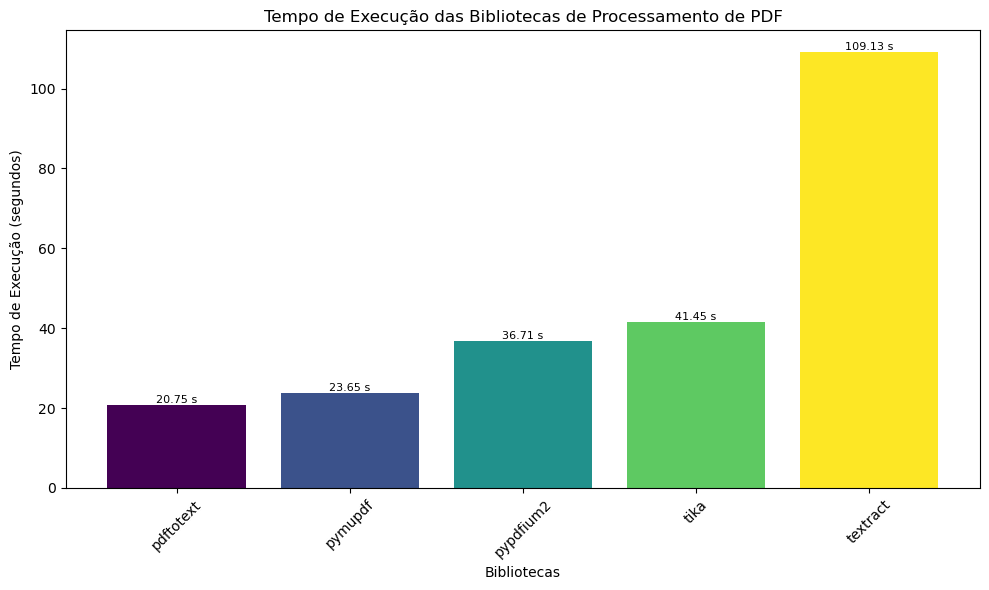

In [31]:
plot_execution_times(libraries, times)